# Binary Logic Regression

Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.

## Binary Logistic Regression Assumptions

1.Binary logistic regression requires the dependent variable to be binary.

2.For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.

3.Only the meaningful variables should be included.

4.The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.

5.The independent variables are linearly related to the log odds.

6.Logistic regression requires quite large sample sizes.

•What is Confusion Matrix?

•True Positive

•False Negative

•False Positive

•True Negative

•Understanding various performance metrics

•Accuracy or Classification Accuracy

•Precision

•Recall or Sensitivity

•Specificity

•F1 Score

•Implementing Confusion Matrix in Python Sklearn – Breast Cancer


Confusion matrix in python helps us describe the performance of a classification model. In order to build a confusion matrix, all we need to do is to create a table of actual values and predicted values.

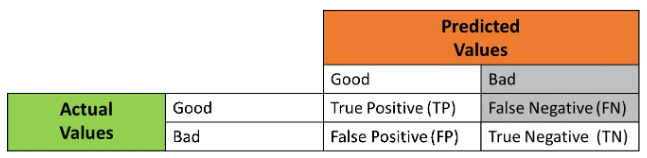

Confusion matrix is quite simple, but the related terminologies can be a bit confusing. Alright, let us understand the terminologies related to confusion matrix with the help of an example.

Let us say, we have a data set with the data of all patients in a hospital. We built a logistic regression model to predict if a patient has cancer or not. There could be four possible outcomes. Let us look at all four.

**True Positive**

True positive is nothing but the case where the actual value as well as the predicted value are true. The patient has been diagnosed with cancer, and the model also predicted that the patient had cancer.


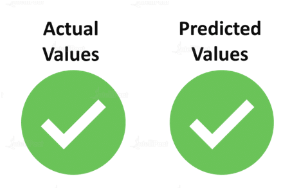

**False Negative**

In false negative, the actual value is true, but the predicted value is false, which means that the patient has cancer, but the model predicted that the patient did not have cancer.

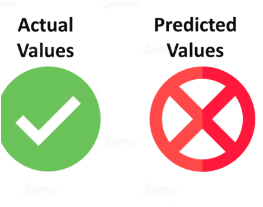

**False Positive**

This is the case where the predicted value is true, but the actual value is false. Here, the model predicted that the patient had cancer, but in reality, the patient doesn’t have cancer. This is also known as Type 1 Error.

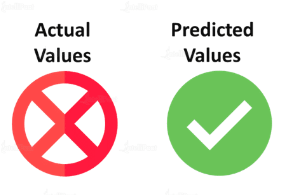

**True Negative**

This is the case where the actual value is false and the predicted value is also false. In other words, the patient is not diagnosed with cancer and our model predicted that the patient did not have cancer.

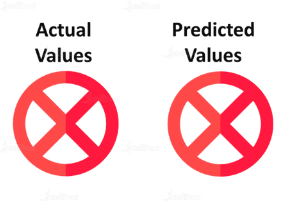

## Understanding Various Performance Metrics
We will be taking the help of a confusion matrix given below in order to find various performance metrics.

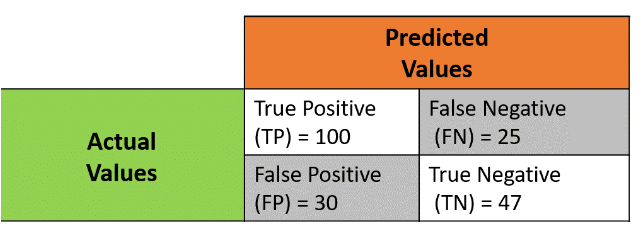

### Accuracy or Classification Accuracy:
In classification problems, ‘accuracy’ refers to the number of correct predictions made by the predictive model over the rest of the predictions.

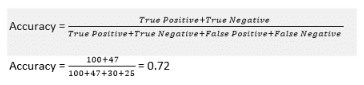

. When to use: When the target variable classes in the data are nearly balanced.

. When not to use: When the target variables in the data are majority of one class.

### Precision
What: Here, ‘precision’ means on what proportion of all predictions that we made with our predictive model are actually true.
How:


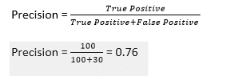

It means, when our model predicts that a patient does not have cancer, it is correct 76 percent of the time.

### Recall or Sensitivity:

What: ‘Recall’ is nothing but the measure that tells what proportion of patients that actually had cancer were also predicted of having cancer. It answers the question, “How sensitive the classifier is in detecting positive instances?”

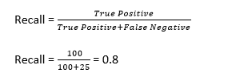

It means that 80 percent of all cancer patients are correctly predicted by the model to have cancer.

### Specificity:

What: It answers question, “How specific or selective is the classifier in predicting negative instances?”
How:

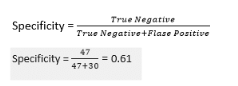

A specificity of 0.61 means 61 percent of all patients that didn’t have cancer are predicted correctly.

### F1 Score
What: This is nothing but the harmonic mean of precision and recall.
How:

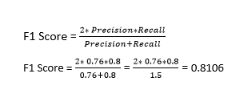

<b>Check the link below for a 3*3 confusion matrix explanation.

https://www.analyticsvidhya.com/blog/2021/06/confusion-matrix-for-multi-class-classification/

In [1]:
import pandas as pd
import numpy as np

## Data

In [2]:
df = pd.read_csv('cancer.csv')
df

,id,Clump Thickness,UofCSize,UofCShape,Marginal Adhesion,SECSize,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,2
679,841769,2,1,1,1,2,1,1,1,1,2
680,888820,5,10,10,3,7,3,8,10,2,4
681,897471,4,8,6,4,3,4,10,6,1,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 683 non-null    int64
 1   Clump Thickness    683 non-null    int64
 2   UofCSize           683 non-null    int64
 3   UofCShape          683 non-null    int64
 4   Marginal Adhesion  683 non-null    int64
 5   SECSize            683 non-null    int64
 6   Bare Nuclei        683 non-null    int64
 7   Bland Chromatin    683 non-null    int64
 8   Normal Nucleoli    683 non-null    int64
 9   Mitoses            683 non-null    int64
 10  Class              683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


In [ ]:
#!pip install scikit-learn

In [3]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

### Split the data into features (X) and target (y) label sets

In [6]:
df["Class"] = df["Class"].astype('category')
print(df.dtypes)
df["Class"] = df["Class"].cat.codes
df.head(10)

id                      int64
Clump Thickness         int64
UofCSize                int64
UofCShape               int64
Marginal Adhesion       int64
SECSize                 int64
Bare Nuclei             int64
Bland Chromatin         int64
Normal Nucleoli         int64
Mitoses                 int64
Class                category
dtype: object


,id,Clump Thickness,UofCSize,UofCShape,Marginal Adhesion,SECSize,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0
5,1017122,8,10,10,8,7,10,9,7,1,1
6,1018099,1,1,1,1,2,10,3,1,1,0
7,1018561,2,1,2,1,2,1,3,1,1,0
8,1033078,2,1,1,1,2,1,1,1,5,0
9,1033078,4,2,1,1,2,1,2,1,1,0


In [7]:
x=pd.DataFrame(df.iloc[:,:-1])
y=pd.DataFrame(df.iloc[:,-1])
X=x.drop("id",axis=1)
y

,Class
0,0
1,0
2,0
3,0
4,0
...,...
678,0
679,0
680,1
681,1


In [8]:
df

,id,Clump Thickness,UofCSize,UofCShape,Marginal Adhesion,SECSize,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,0
679,841769,2,1,1,1,2,1,1,1,1,0
680,888820,5,10,10,3,7,3,8,10,2,1
681,897471,4,8,6,4,3,4,10,6,1,1


In [9]:
X

,Clump Thickness,UofCSize,UofCShape,Marginal Adhesion,SECSize,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2,1,1,1
679,2,1,1,1,2,1,1,1,1
680,5,10,10,3,7,3,8,10,2
681,4,8,6,4,3,4,10,6,1


### Logistic Regression Model Fitting

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [11]:
logreg.intercept_

array([-9.17800857])

In [12]:
logreg.coef_

array([[0.39437087, 0.14430969, 0.21099734, 0.19743883, 0.22347712,
        0.46479907, 0.31518037, 0.24472357, 0.18561999]])

### Predicting the test set results and calculating the accuracy

In [13]:
y_pred = logreg.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1], dtype=int8)

In [14]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.96


Accuracy of logistic regression classifier on test set: 0.96

### Confusion Matrix

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[126   4]
 [  5  70]]


In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       130
           1       0.95      0.93      0.94        75

    accuracy                           0.96       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.96      0.96      0.96       205



In [24]:
#df.to_csv("df8.csv")

In [ ]:
#df.to_csv(r'Path where you want to store the exported CSV file\File Name.csv', index = False)